In [206]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm, t, chi2
import matplotlib.pyplot as plt
from random import randint

The categories we have chosen to consider are:
  * Red wine
  * White wine

In [207]:
red_wine_csv = pd.read_csv("/data/workspace_files/Dataset/winequality-red.csv", sep=';')
white_wine_csv = pd.read_csv("/data/workspace_files/Dataset/winequality-white.csv", sep=';')

ilai avni 212778229 <br>
idan pogrebinsky 325069565

# Question 1

## a.

In [208]:
red_pH = red_wine_csv["pH"]
white_pH = white_wine_csv["pH"]
# Compute means of pH values per category
red_mean = red_pH.mean()
white_mean = white_pH.mean()

In [209]:
# Compute variance of pH values per category
red_var = red_pH.var(ddof=0)
white_var = white_pH.var(ddof=0)

In [210]:
print(f"Red wine mean: {red_mean}")
print(f"White wine mean: {white_mean}")

Red wine mean: 3.3111131957473416
White wine mean: 3.1882666394446715


## b.

In [211]:
# Compute scores of each category
red_score = np.sqrt(red_var/red_pH.shape[0])
white_score = np.sqrt(white_var/white_pH.shape[0])

# Compute confidence interval per category
quantile = norm.ppf(0.975)
red_low = round(red_mean - red_score * quantile, 4)
red_high = round(red_mean + red_score * quantile, 4)
white_low = round(white_mean - white_score * quantile, 4)
white_high = round(white_mean + white_score * quantile, 4)

In [212]:
print(f"the red confidence interval is [{red_low}, {red_high}]")
print(f"the white confidence interval is [{white_low}, {white_high}]")

the red confidence interval is [3.3035, 3.3187]
the white confidence interval is [3.184, 3.1925]



The reason we can make such an assumption is that the average is a sum of i.i.d random variables ($\frac{1}{n}X_i$) therefor by CLT the distrebution of the mean approaches the normal distrebution with the given parameters.

# c.
The confidence intervals don't overlap, so we can say with 95% confidence that the average is different.
Thus conclude that they are different.

# Question 2

## a. 

Our hypothesis is as follows:
- $H_0: \bar{X}_{red} = \bar{X}_{white}$
- $H_1: \bar{X}_{red} \neq \bar{X}_{white}$

## b.

<AxesSubplot:title={'center':'White'}>

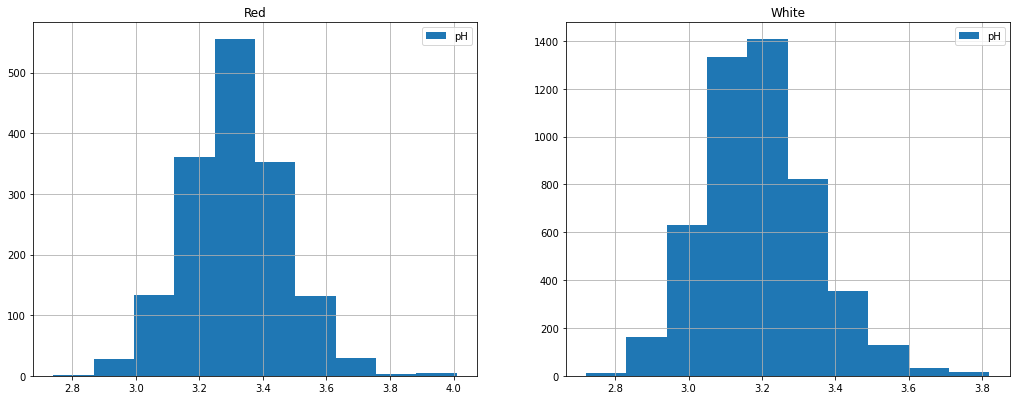

In [213]:
fig, ax = plt.subplots(1, 2)
ax[0].title.set_text("Red")
red_pH.hist(bins=10, ax=ax[0], legend=True)
ax[1].title.set_text("White")
white_pH.hist(bins=10, ax=ax[1], legend=True)

As we can see, both categories are distributed approximately normally.
Next, we perform F-test to check whether the variance of the categories are the same.

In [214]:
f = red_pH.var() / white_pH.var()
red_num = red_pH.size-1 #define degrees of freedom numerator 
white_num = white_pH.size-1 #define degrees of freedom denominator 
p = 1-scipy.stats.f.cdf(f, red_num, white_num) #find p-value of F test statistic 
print(p)

0.13579391895268


The p-value is greater than 0.05, therefore we accept the null hypothesis of the F-test and conclude that the variances of both categories are equal.
<br>
Now all requirements for the T-test have been met.

## c.

In [215]:

S = np.sqrt((red_num*red_pH.var() + white_num*white_pH.var()) / (red_num + white_num))
T = (red_mean - white_mean) / (S * np.sqrt(1/(red_num + 1) + 1/(white_num + 1)))
t_quantile = norm.ppf(0.975)
print((np.abs(T) > t_quantile))

True


From the result of the t-test we conclude that the means of the red and white pH values are different.

## d.

In [216]:
se = red_var/red_pH.shape[0] + white_var/white_pH.shape[0]
w = (red_mean - white_mean)/np.sqrt(se)
norm_quant = norm.ppf(0.975)
print((np.abs(w) <= norm_quant))

False


from the Wald test we conclude that the means of the red and white pH values aren't different.
thus the null hypothesis still holds.

## e.

In [222]:
if w > 0:
    pw = 1 - norm.cdf(w) + norm.cdf(-w)
else:
    pw = 1 - norm.cdf(-w) + norm.cdf(w)

if T > 0:
    pt = 1 - t.cdf(T, red_num+white_num-2) + t.cdf(-T, red_num+white_num-2)
else:
    pt = 1 - t.cdf(-T, red_num+white_num-2) + t.cdf(T, red_num+white_num-2)

pf = 1-scipy.stats.f.cdf(f, red_num, white_num)

print(f"The p-values of\tT-test {pt}\tF-test {pf}\tW-test {pw}")
print(f"The values of  \tT-test {round(T,3)}\tF-test {round(f,3)}\tW-test {round(f,3)}\t")

The p-values of	T-test 2.98051174707851e-164	F-test 0.13579391895268	W-test 3.500935319182937e-170
The values of  	T-test 28.09	F-test 1.045	W-test 1.045	


## f.

In [129]:
red_likelihood, white_likelihood = 0, 0
for x in red_pH:
    red_likelihood += np.log(norm.pdf(x, loc=red_mean, scale=S))
for x in white_pH:
    white_likelihood += np.log(norm.pdf(x, loc=white_mean, scale=S))
log_likelihood = red_likelihood + white_likelihood

total_log_likelihood = 0
all_pH = red_pH.append(white_pH, ignore_index=True)
for x in all_pH:
    total_log_likelihood += norm.pdf(x, loc=all_pH.mean(), scale=all_pH.std())

gamma = 2 * (log_likelihood - total_log_likelihood)
chi2_quantile = chi2.ppf(0.975, df=1)
print(np.abs(gamma) > chi2_quantile)

True


We conclude from the log-likelihood ratio test that the means are different.

# Question 3

## a, b.

In [130]:
def conf_interval(samples, quantile):
    # Compute mean and variance
    mean, var = samples.mean(), samples.var(ddof=0)
    # Compute scores
    score = np.sqrt(var/samples.shape[0])
    # Compute confidence interval
    quantile = norm.ppf(0.975)
    low = mean - score * quantile
    high = mean + score * quantile
    return round(low, 4), round(high, 4)

In [132]:
print(f"All samples confidence interval for red category: {red_low, red_high}")
for num in [30, 50, 100, 500]:
    red_samples = red_pH.sample(num)
    print(f"Confidence interval from {num} samples: {conf_interval(red_samples, quantile)}")
print(f"All samples confidence interval for white category: {white_low, white_high}")
for num in [30, 50, 100, 500]:
    white_samples = white_pH.sample(num)
    print(f"Confidence interval from {num} samples: {conf_interval(white_samples, quantile)}")

All samples confidence interval for red category: (3.3035, 3.3187)
Confidence interval from 30 samples: (3.2763, 3.3943)
Confidence interval from 50 samples: (3.2567, 3.3361)
Confidence interval from 100 samples: (3.2869, 3.3495)
Confidence interval from 500 samples: (3.2887, 3.3149)
All samples confidence interval for white category: (3.184, 3.1925)
Confidence interval from 30 samples: (3.0896, 3.2177)
Confidence interval from 50 samples: (3.158, 3.2304)
Confidence interval from 100 samples: (3.1394, 3.2)
Confidence interval from 500 samples: (3.1784, 3.2036)


## c.

In [164]:
def wald_test(red_samples, white_samples):
    se = red_samples.var()/red_samples.shape[0] + white_samples.var()/white_samples.shape[0]
    w = (red_samples.mean() - white_samples.mean())/np.sqrt(se)
    norm_quant = norm.ppf(0.975)
    if w > 0:
        p = 1 - norm.cdf(w) + norm.cdf(-w)
    else:
        p = 1 - norm.cdf(-w) + norm.cdf(w)
    return np.abs(w) <= norm_quant, p

In [165]:
print("Wald test result on all samples: False")
for red_num in [30, 50, 100, 500]:
    for white_num in [30, 50, 100, 500]:
        red_samples = red_pH.sample(red_num)
        white_samples = white_pH.sample(white_num)
        accept_null, p = wald_test(red_samples, white_samples)
        
        print(f"Wald test result for {red_num} red samples and {white_num} white samples: {accept_null}")

Wald test result on all samples: False
Wald test result for 30 red samples and 30 white samples: False
Wald test result for 30 red samples and 50 white samples: False
Wald test result for 30 red samples and 100 white samples: False
Wald test result for 30 red samples and 500 white samples: False
Wald test result for 50 red samples and 30 white samples: False
Wald test result for 50 red samples and 50 white samples: False
Wald test result for 50 red samples and 100 white samples: False
Wald test result for 50 red samples and 500 white samples: False
Wald test result for 100 red samples and 30 white samples: False
Wald test result for 100 red samples and 50 white samples: False
Wald test result for 100 red samples and 100 white samples: False
Wald test result for 100 red samples and 500 white samples: False
Wald test result for 500 red samples and 30 white samples: False
Wald test result for 500 red samples and 50 white samples: False
Wald test result for 500 red samples and 100 white sa

## d.

In [172]:
print(red_pH.shape[0])
print(white_pH.shape[0])

1599
4898


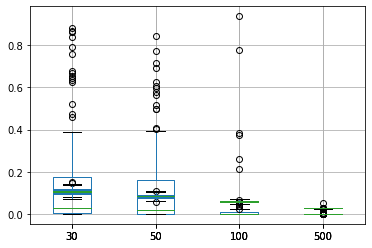

In [174]:
# num_samples = np.arange(1001)
p_values = []
r_conf_int_sizes = []
w_conf_int_sizes = []
num_samples = [60, 80, 100, 130, 150, 200, 530, 550, 600, 1000]

for _ in range(100):
    temp = {}
    for num in [30, 50, 100, 500]:
        red_samples = red_pH.sample(num)
        low, high = conf_interval(red_samples, quantile)
        temp[num] = high - low
        # r_conf_int_sizes[num] = high - low
    r_conf_int_sizes.append(temp)
    temp = {}
    for num in [30, 50, 100, 500]:
        white_samples = white_pH.sample(num)
        low, high = conf_interval(white_samples, quantile)
        temp[num] = high - low
        # w_conf_int_sizes[num] = high - low
    w_conf_int_sizes.append(temp)
    temp = {}
    for num in [30, 50, 100, 500]:
        red = randint(1, num - 1)
        red_samples = red_pH.sample(red)
        white_samples = white_pH.sample(num - red)
        accept_null, p = wald_test(red_samples, white_samples)
        # p_values[red_num + white_num] = np.log(p)
        temp[num] = p
    p_values.append(temp)

p_values = pd.DataFrame(p_values)
r_conf_int_sizes = pd.DataFrame(r_conf_int_sizes)
w_conf_int_sizes = pd.DataFrame(w_conf_int_sizes)
    

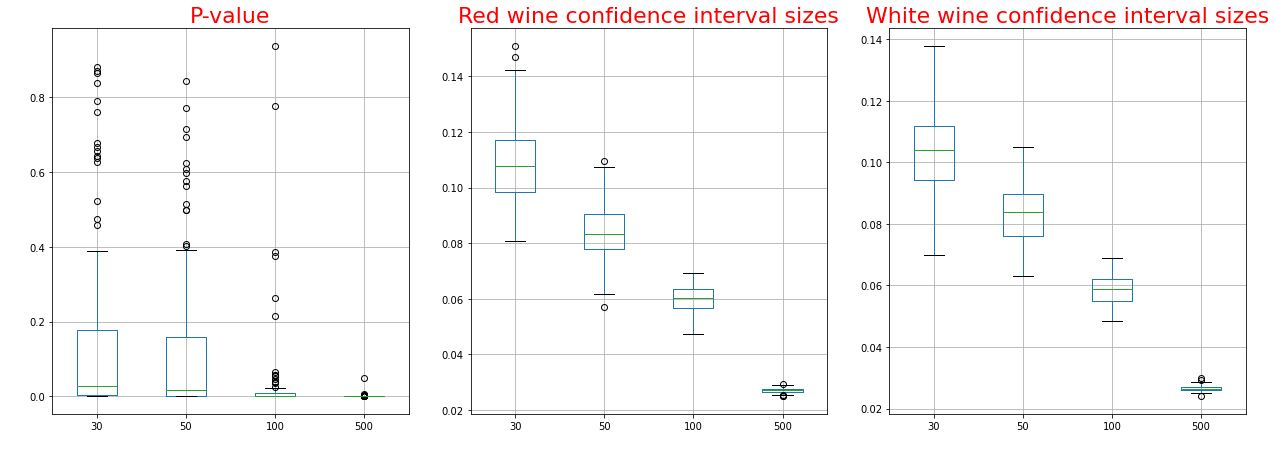

In [198]:
plt.rcParams["figure.figsize"] = [17.50, 6.50]

fig, ax = plt.subplots(1, 3)


ax[0].set_title("P-value", fontsize=22, color='Red')
ax[0].set_xlabel("Sample Size", fontsize=18, color='White')
ax[0].set_ylabel("p-value", fontsize=18, color='White')
p_val_box = p_values.boxplot([30, 50, 100, 500], ax=ax[0])
ax[1].set_ylabel("Confidence Interval Size", fontsize=18, color='White')
ax[1].set_xlabel("Sample Size", fontsize=18, color='White')
ax[1].set_title("Red wine confidence interval sizes", fontsize=22, color="Red")
r_conf_box = r_conf_int_sizes.boxplot([30, 50, 100, 500], ax=ax[1])
ax[2].set_ylabel("Confidence Interval Size", fontsize=18, color='White')
ax[2].set_xlabel("Sample Size", fontsize=18, color='White')
ax[2].set_title("White wine confidence interval sizes", fontsize=22, color="Red")
w_conf_box = w_conf_int_sizes.boxplot([30, 50, 100, 500], ax=ax[2])
plt.tight_layout()
plt.show()

